Natural Gas Usage Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('NaturalGas.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

D:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


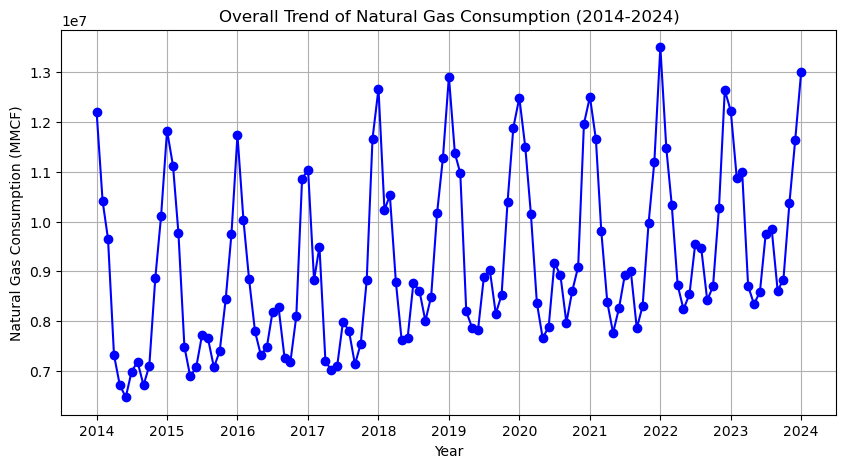

In [7]:

# Sample data loading and preparation
data['Date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
monthly_data = data.groupby('Date')['value'].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Date'], monthly_data['value'], marker='o', linestyle='-', color='b')
plt.title('Overall Trend of Natural Gas Consumption (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Natural Gas Consumption (MMCF)')
plt.grid(True)
plt.show()


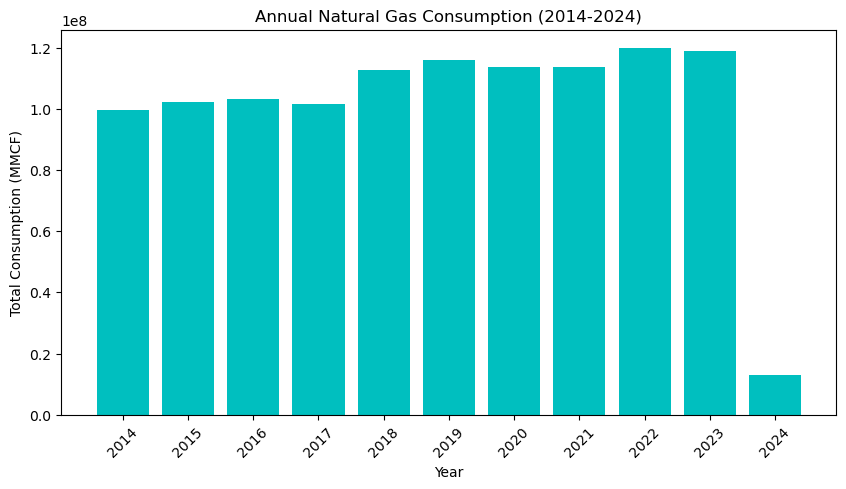

In [8]:
# Calculating annual consumption
annual_data = data.groupby(data['year'])['value'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(annual_data['year'], annual_data['value'], color='c')
plt.title('Annual Natural Gas Consumption (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Total Consumption (MMCF)')
plt.xticks(annual_data['year'], rotation=45)
plt.show()



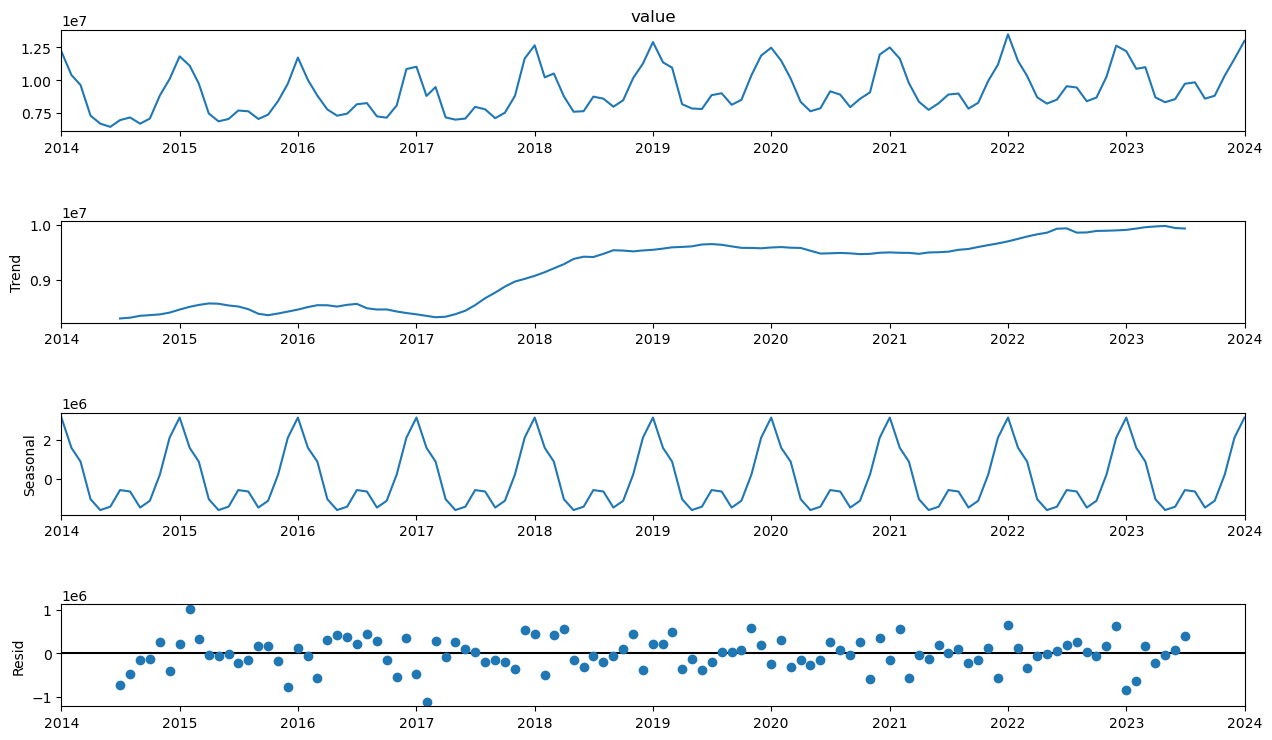

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the index to Date for decomposition
monthly_data.set_index('Date', inplace=True)

# Decomposing the series
result = seasonal_decompose(monthly_data['value'], model='additive', period=12)

# Plotting the decomposition
fig = result.plot()
fig.set_size_inches(14, 8)
plt.show()
